# preprocessing and EDA Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
kidney_data = pd.read_csv("kidney_disease_dataset.csv")

# Display basic information about the dataset
kidney_data.info()
kidney_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          972 non-null    int64  
 1   Age                 972 non-null    int64  
 2   Gender              972 non-null    object 
 3   Serum_Creatinine    972 non-null    float64
 4   Blood_Pressure      972 non-null    int64  
 5   Diabetes            972 non-null    int64  
 6   Days_In_Hospital    972 non-null    int64  
 7   Received_Treatment  972 non-null    int64  
 8   City                972 non-null    object 
 9   Deaths              972 non-null    int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 76.1+ KB


,Patient_ID,Age,Gender,Serum_Creatinine,Blood_Pressure,Diabetes,Days_In_Hospital,Received_Treatment,City,Deaths
0,1,57,Female,0.7,134,0,9,0,Pune,1
1,2,79,Female,0.7,143,0,19,1,Mumbai,1
2,3,77,Male,0.9,133,0,1,0,Pune,1
3,4,67,Female,1.7,117,0,10,0,Kolkata,1
4,5,90,Male,0.9,149,1,7,0,Ahmedabad,1


In [ ]:
# Check for missing values
missing_values = kidney_data.isnull().sum()

# Display missing values per column
print(missing_values)


Patient_ID            0
Age                   0
Gender                0
Serum_Creatinine      0
Blood_Pressure        0
Diabetes              0
Days_In_Hospital      0
Received_Treatment    0
City                  0
Deaths                0
dtype: int64


In [ ]:
# Drop 'Patient_ID' column
kidney_data_cleaned = kidney_data.drop(columns=['Patient_ID'], errors='ignore')

# Display dataset structure after dropping
kidney_data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 972 non-null    int64  
 1   Gender              972 non-null    object 
 2   Serum_Creatinine    972 non-null    float64
 3   Blood_Pressure      972 non-null    int64  
 4   Diabetes            972 non-null    int64  
 5   Days_In_Hospital    972 non-null    int64  
 6   Received_Treatment  972 non-null    int64  
 7   City                972 non-null    object 
 8   Deaths              972 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 68.5+ KB


In [ ]:
# Convert 'Gender' and 'City' to categorical codes
kidney_data_cleaned['Gender'] = kidney_data_cleaned['Gender'].astype('category').cat.codes
kidney_data_cleaned['City'] = kidney_data_cleaned['City'].astype('category').cat.codes

# Display dataset info after encoding
kidney_data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 972 non-null    int64  
 1   Gender              972 non-null    int8   
 2   Serum_Creatinine    972 non-null    float64
 3   Blood_Pressure      972 non-null    int64  
 4   Diabetes            972 non-null    int64  
 5   Days_In_Hospital    972 non-null    int64  
 6   Received_Treatment  972 non-null    int64  
 7   City                972 non-null    int8   
 8   Deaths              972 non-null    int64  
dtypes: float64(1), int64(6), int8(2)
memory usage: 55.2 KB


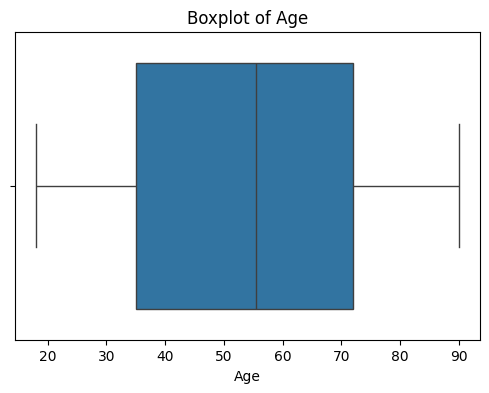

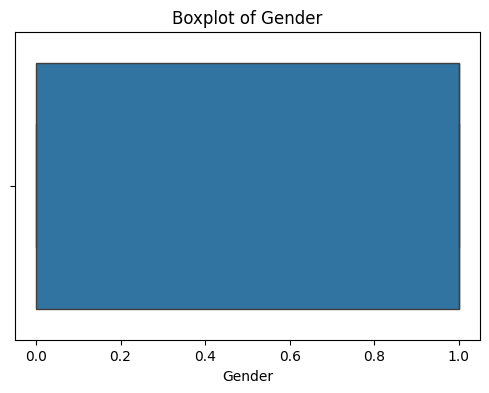

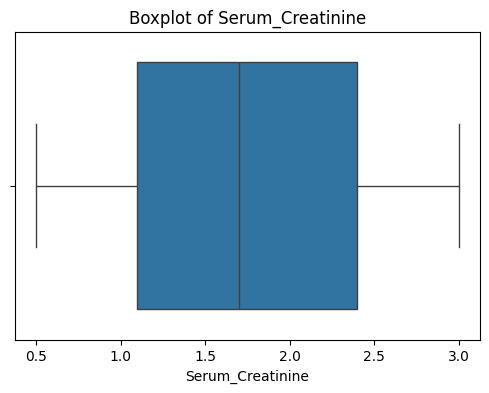

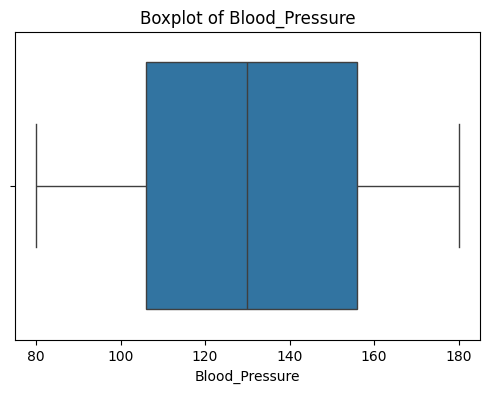

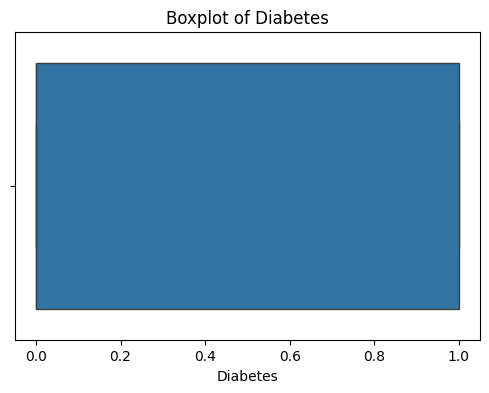

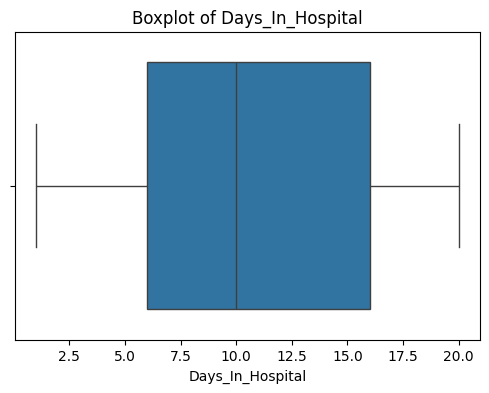

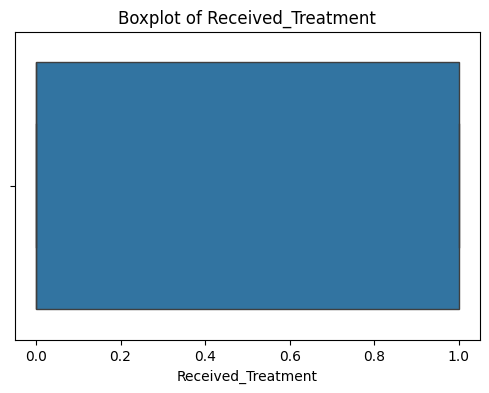

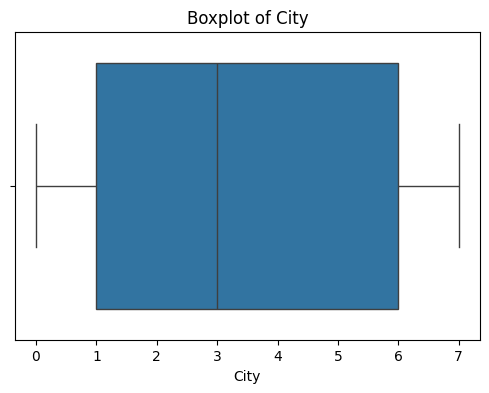

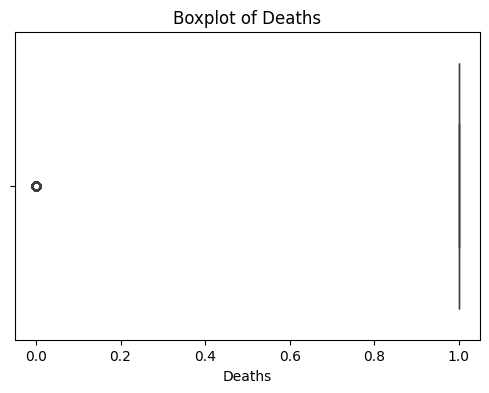

In [ ]:
# Identify numerical columns
numerical_columns = kidney_data_cleaned.select_dtypes(include=[np.number]).columns.tolist()

# Plot boxplots for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=kidney_data_cleaned[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()


In [ ]:
def remove_outliers(df, column):
    """
    Remove outliers from a specified numerical column using the IQR method.

    Parameters:
    df (pd.DataFrame): The dataset.
    column (str): The column name.

    Returns:
    pd.DataFrame: The dataset with outliers removed for the specified column.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal to specific numerical columns
columns_to_clean = ['Serum_Creatinine', 'Blood_Pressure', 'Days_In_Hospital']
for col in columns_to_clean:
    kidney_data_cleaned = remove_outliers(kidney_data_cleaned, col)

# Display updated dataset shape after outlier removal
kidney_data_cleaned.shape


(972, 9)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns for scaling (excluding binary categorical columns)
scaling_columns = ['Age', 'Serum_Creatinine', 'Blood_Pressure', 'Days_In_Hospital']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling
kidney_data_cleaned[scaling_columns] = scaler.fit_transform(kidney_data_cleaned[scaling_columns])

# Display summary statistics after scaling
kidney_data_cleaned[scaling_columns].describe()


,Age,Serum_Creatinine,Blood_Pressure,Days_In_Hospital
count,972.000000,972.000000,972.000000,972.000000
mean,0.503658,0.501811,0.503961,0.506389
std,0.293695,0.289251,0.292571,0.298651
min,0.000000,0.000000,0.000000,0.000000
25%,0.236111,0.240000,0.260000,0.263158
50%,0.520833,0.480000,0.500000,0.473684
75%,0.750000,0.760000,0.760000,0.789474
max,1.000000,1.000000,1.000000,1.000000


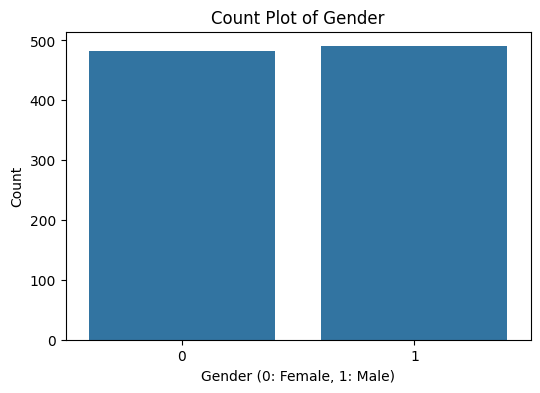

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=kidney_data_cleaned["Gender"])
plt.title("Count Plot of Gender")
plt.xlabel("Gender (0: Female, 1: Male)")
plt.ylabel("Count")
plt.show()


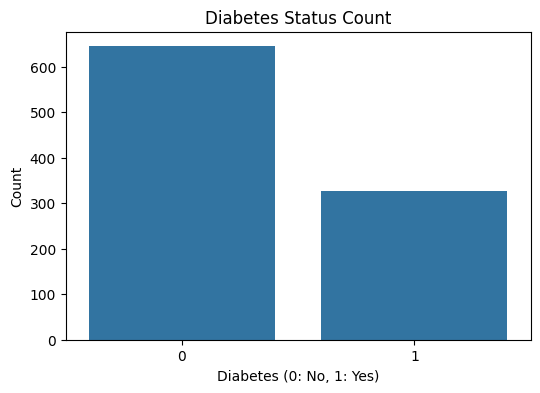

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=kidney_data_cleaned["Diabetes"])
plt.title("Diabetes Status Count")
plt.xlabel("Diabetes (0: No, 1: Yes)")
plt.ylabel("Count")
plt.show()


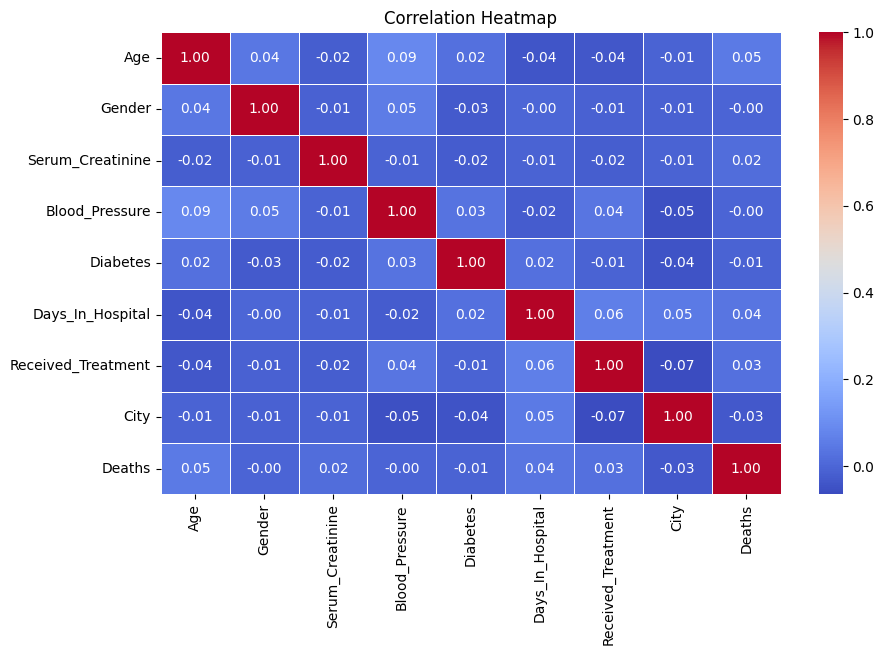

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(kidney_data_cleaned.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


# Train and split dataset

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target
X = kidney_data_cleaned.drop(columns=['Deaths'])
y = kidney_data_cleaned['Deaths']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalize numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Models Implementation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(n_estimators=100, class_weight='balanced'),
    'XGBoost': XGBClassifier(n_estimators=50, use_label_encoder=False, class_weight='balanced', eval_metric='logloss')
}

# Train and evaluate
metrics = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"\n {name} ")
    print(classification_report(y_test, y_pred, zero_division=0))
    metrics.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred, zero_division=0),
        'F1 Score': f1_score(y_test, y_pred, zero_division=0)
    })



 Logistic Regression 
              precision    recall  f1-score   support

           0       0.17      0.65      0.27        23
           1       0.92      0.57      0.71       172

    accuracy                           0.58       195
   macro avg       0.55      0.61      0.49       195
weighted avg       0.84      0.58      0.65       195


 Random Forest 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.88      0.99      0.93       172

    accuracy                           0.88       195
   macro avg       0.44      0.50      0.47       195
weighted avg       0.78      0.88      0.82       195


 XGBoost 
              precision    recall  f1-score   support

           0       0.08      0.04      0.06        23
           1       0.88      0.93      0.90       172

    accuracy                           0.83       195
   macro avg       0.48      0.49      0.48       195
weighted avg       0.78

# model evaluation


In [ ]:
import pandas as pd

# Tabular comparison of results
results_df = pd.DataFrame(metrics)
print("Model Performance Comparison:")
print(results_df)


Model Performance Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.579487   0.924528  0.569767  0.705036
1        Random Forest  0.876923   0.881443  0.994186  0.934426
2              XGBoost  0.825641   0.879121  0.930233  0.903955
